In [2]:
!pip install numpy
!pip install scikit-learn
!pip install qiskit_machine_learning
!pip install pillow
!pip install kagglehub
!pip install monai
!pip install matplotlib
!pip install torch
!pip install qiskit
!pip install pylatexenc
!pip install torchvision
!pip install ipywidgets
!pip install opencv-python
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 69.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 33.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.5 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=822519fe7681df9e4cc462a0842bc41aab18bef8cf6f4ccfa692577228549e49
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successful

In [3]:
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from monai.transforms import ScaleIntensity
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from qiskit.circuit import QuantumCircuit
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
import torch
from torch import nn
import torch.optim as optim 
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

In [4]:
path = kagglehub.dataset_download(r"navoneel/brain-mri-images-for-brain-tumor-detection")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-mri-images-for-brain-tumor-detection


In [8]:
# ✅ Install required libraries (if not installed)
!pip install qiskit qiskit-machine-learning torch torchvision matplotlib scikit-learn numpy pillow

# ✅ Import Libraries
import os
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# ✅ Set dataset paths (Fixed Path)
dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"
tumor_path = os.path.join(dataset_path, "yes")  # Tumor
no_tumor_path = os.path.join(dataset_path, "no")  # No Tumor

# ✅ Class mapping
class_labels = {0: "No Tumor", 1: "Tumor"}

# ✅ Function to Load Images (Fixed)
def load_images_from_folder(folder, label, target_size=(128, 128)):
    data, labels = [], []
    for img_path in glob.glob(os.path.join(folder, "*")):  # Loads all image types
        try:
            img = Image.open(img_path).convert("RGB").resize(target_size)
            data.append(np.array(img))
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")  # Debug error
    return np.array(data), np.array(labels)

# ✅ Load Data
tumor_data, tumor_labels = load_images_from_folder(tumor_path, label=1)
no_tumor_data, no_tumor_labels = load_images_from_folder(no_tumor_path, label=0)

# ✅ Debug: Check if images are loading
print(f"✅ Tumor images loaded: {len(tumor_data)}")
print(f"✅ No Tumor images loaded: {len(no_tumor_data)}")

# ✅ Ensure dataset is not empty before proceeding
if len(tumor_data) == 0 or len(no_tumor_data) == 0:
    raise ValueError("Dataset is empty! Check dataset paths and image formats.")

# ✅ Combine all data
X = np.concatenate([tumor_data, no_tumor_data], axis=0) / 255.0  # Normalize images
y = np.concatenate([tumor_labels, no_tumor_labels], axis=0)

# ✅ Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Convert Labels to One-Hot Encoding
y_train = np.eye(2)[y_train]
y_test = np.eye(2)[y_test]

print(f"✅ Training samples: {X_train.shape[0]}")
print(f"✅ Testing samples: {X_test.shape[0]}")


✅ Tumor images loaded: 155
✅ No Tumor images loaded: 98
✅ Training samples: 202
✅ Testing samples: 51


In [18]:
# ✅ Install required libraries (if not installed)
!pip install qiskit qiskit-machine-learning torch torchvision matplotlib scikit-learn numpy pillow seaborn

# ✅ Import Libraries
import os
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from PIL import Image
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# ✅ Set dataset paths
dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"
tumor_path = os.path.join(dataset_path, "yes")  # Tumor
no_tumor_path = os.path.join(dataset_path, "no")  # No Tumor

# ✅ Class mapping
class_labels = {0: "No Tumor", 1: "Tumor"}

# ✅ Function to Load Images
def load_images_from_folder(folder, label, target_size=(128, 128)):
    data, labels = [], []
    for img_path in glob.glob(os.path.join(folder, "*")):
        try:
            img = Image.open(img_path).convert("RGB").resize(target_size)
            data.append(np.array(img))
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    return np.array(data), np.array(labels)

# ✅ Load Data
tumor_data, tumor_labels = load_images_from_folder(tumor_path, label=1)
no_tumor_data, no_tumor_labels = load_images_from_folder(no_tumor_path, label=0)

# ✅ Ensure dataset is not empty
if len(tumor_data) == 0 or len(no_tumor_data) == 0:
    raise ValueError("Dataset is empty! Check dataset paths and image formats.")

# ✅ Combine all data
X = np.concatenate([tumor_data, no_tumor_data], axis=0) / 255.0  # Normalize images
y = np.concatenate([tumor_labels, no_tumor_labels], axis=0)

# ✅ Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Convert Labels to One-Hot Encoding
y_train = np.eye(2)[y_train]
y_test = np.eye(2)[y_test]

# ✅ Move Model and Data to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Convert Data to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# ✅ Define DataLoader
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

# ✅ Create Quantum Neural Network (QNN)
def create_qnn():
    num_qubits = 3
    feature_map = ZZFeatureMap(feature_dimension=num_qubits)
    ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)

    qc = QuantumCircuit(num_qubits)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True  
    )
    
    return qnn

# ✅ Quantum-CNN Model
class QuantumCNN(nn.Module):
    def __init__(self, quantum_layer):
        super(QuantumCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, 3, 1, 0)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 0)
        self.pool = nn.MaxPool2d(2, 2)

        self.quantum_layer = quantum_layer
        
        self.fc1 = nn.Linear(246017, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 2)

        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(x.size(0), -1)  
        quantum_input = torch.rand(x.size(0), 3).to(x.device)  
        quantum_out = self.quantum_layer(quantum_input)
        x = torch.cat((x, quantum_out), dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# ✅ Initialize Quantum-CNN Model
qnn = create_qnn()
quantum_layer = TorchConnector(qnn)
quantum_model = QuantumCNN(quantum_layer).to(device)

# ✅ Store training and testing metrics
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

# ✅ Train Function
def fit_quantum_model(model, train_loader, test_loader, epochs=10, save_path="quantum_cnn_model.pth"):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        train_loss, correct_train, total_train = 0, 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.argmax(y_batch, dim=1))
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            correct_train += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
            total_train += y_batch.size(0)

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train * 100)

        # ✅ Evaluate on Test Data
        model.eval()
        test_loss, correct_test, total_test = 0, 0, 0

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, torch.argmax(y_batch, dim=1))
                
                test_loss += loss.item()
                correct_test += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
                total_test += y_batch.size(0)

        test_losses.append(test_loss / len(test_loader))
        test_accuracies.append(correct_test / total_test * 100)

        print(f"Epoch {epoch+1}/{epochs}, Train Acc: {train_accuracies[-1]:.2f}%, Test Acc: {test_accuracies[-1]:.2f}%, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

    torch.save(model.state_dict(), save_path)
    print(f"Model saved at {save_path}")

# ✅ Train Model
fit_quantum_model(quantum_model, train_loader, test_loader, epochs=10)


Epoch 1/10, Train Acc: 56.93%, Test Acc: 78.43%, Train Loss: 1.5081, Test Loss: 0.6379
Epoch 2/10, Train Acc: 72.77%, Test Acc: 70.59%, Train Loss: 0.6227, Test Loss: 0.5908
Epoch 3/10, Train Acc: 80.20%, Test Acc: 74.51%, Train Loss: 0.5086, Test Loss: 0.5850
Epoch 4/10, Train Acc: 82.67%, Test Acc: 78.43%, Train Loss: 0.3949, Test Loss: 0.5586
Epoch 5/10, Train Acc: 87.62%, Test Acc: 80.39%, Train Loss: 0.2837, Test Loss: 0.6585
Epoch 6/10, Train Acc: 93.56%, Test Acc: 58.82%, Train Loss: 0.1709, Test Loss: 1.0373
Epoch 7/10, Train Acc: 88.12%, Test Acc: 66.67%, Train Loss: 0.2513, Test Loss: 0.6714
Epoch 8/10, Train Acc: 96.04%, Test Acc: 76.47%, Train Loss: 0.1415, Test Loss: 0.9162
Epoch 9/10, Train Acc: 96.04%, Test Acc: 80.39%, Train Loss: 0.0786, Test Loss: 0.9343
Epoch 10/10, Train Acc: 98.51%, Test Acc: 82.35%, Train Loss: 0.0532, Test Loss: 0.7047
Model saved at quantum_cnn_model.pth


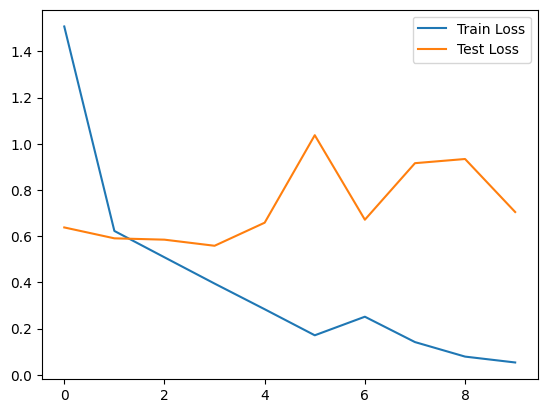

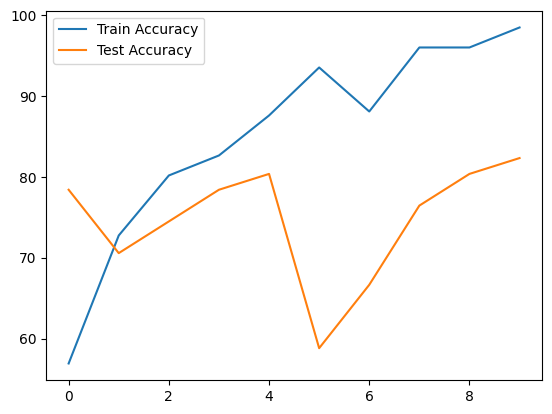

In [25]:
# ✅ Plot Graphs
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()

plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.legend()
plt.show()

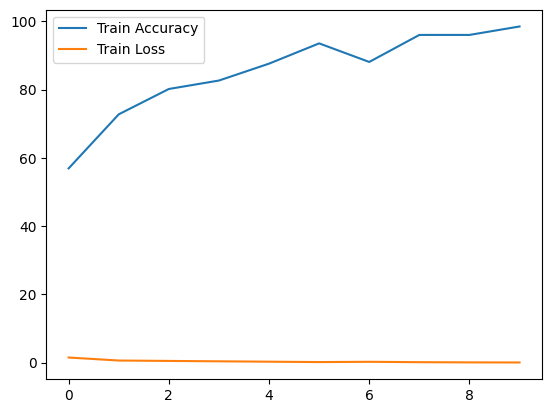

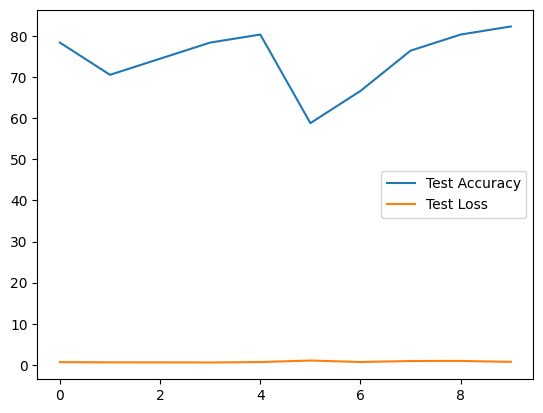

In [28]:
# ✅ Plot Graphs
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(train_losses, label="Train Loss")
plt.legend()
plt.show()

plt.plot(test_accuracies, label="Test Accuracy")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()

In [27]:
# CLASSIFICATION REPORT - CONFUSION MATRIX - PLOTS


🔹 Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.82      0.70      0.76        20
       Tumor       0.82      0.90      0.86        31

    accuracy                           0.82        51
   macro avg       0.82      0.80      0.81        51
weighted avg       0.82      0.82      0.82        51



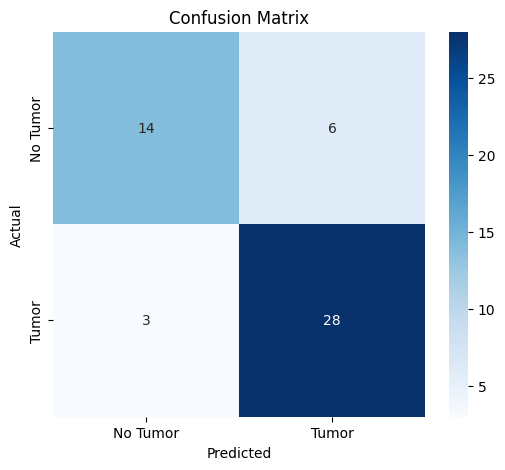

<Figure size 800x500 with 0 Axes>

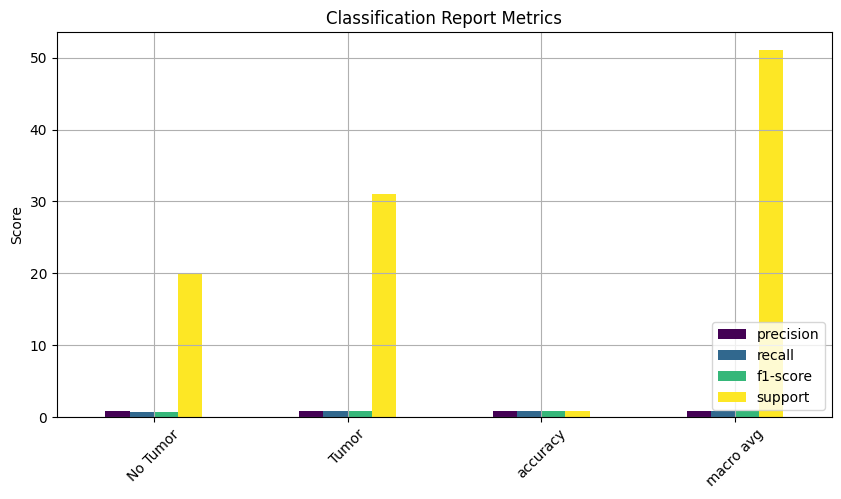

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# ✅ Evaluate Model on Test Data
y_true, y_pred = [], []
quantum_model.eval()

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = quantum_model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        labels = torch.argmax(y_batch, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(labels)

# ✅ Generate Classification Report
report = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"])
print("\n🔹 Classification Report:\n")
print(report)

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# ✅ Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Convert Classification Report to DataFrame for Bar Chart
report_dict = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# ✅ Plot Classification Report Metrics as Bar Chart
plt.figure(figsize=(8, 5))
report_df.iloc[:-1, :].plot(kind='bar', figsize=(10, 5), colormap="viridis")
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# ALL POSSIBLE GRAPHS

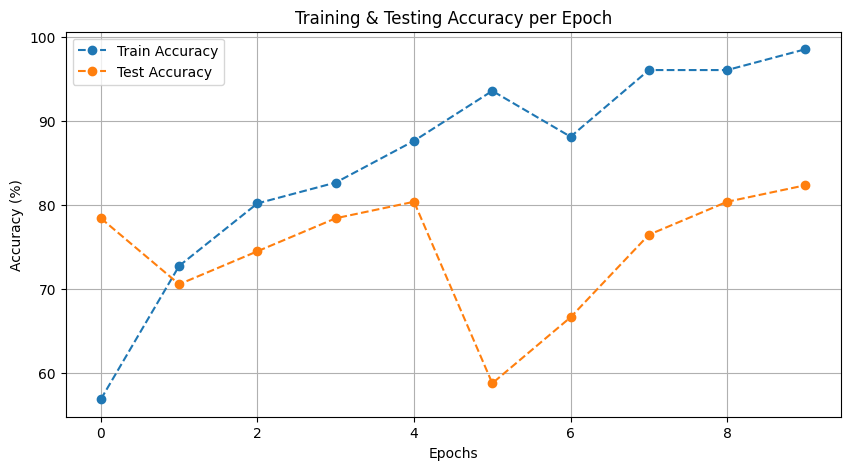

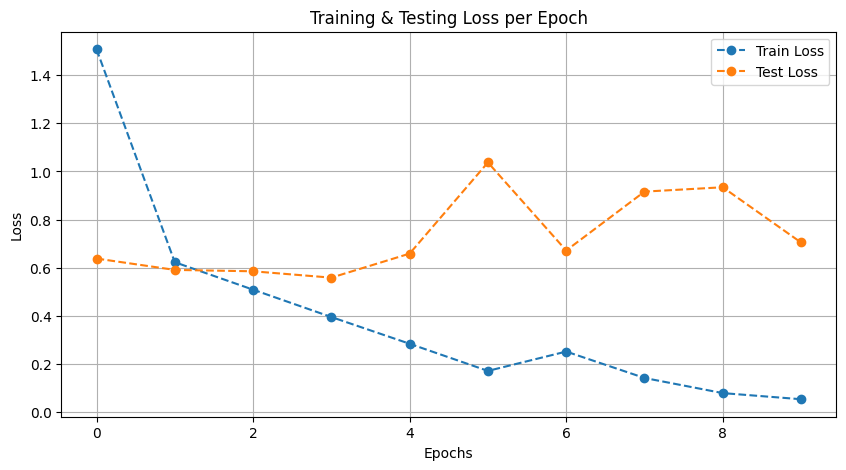


🔹 Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.82      0.70      0.76        20
       Tumor       0.82      0.90      0.86        31

    accuracy                           0.82        51
   macro avg       0.82      0.80      0.81        51
weighted avg       0.82      0.82      0.82        51



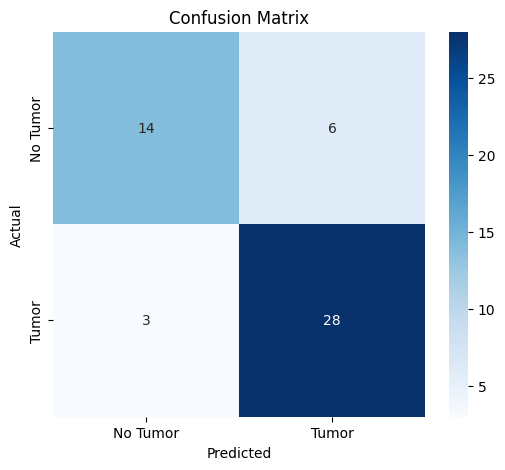

<Figure size 800x500 with 0 Axes>

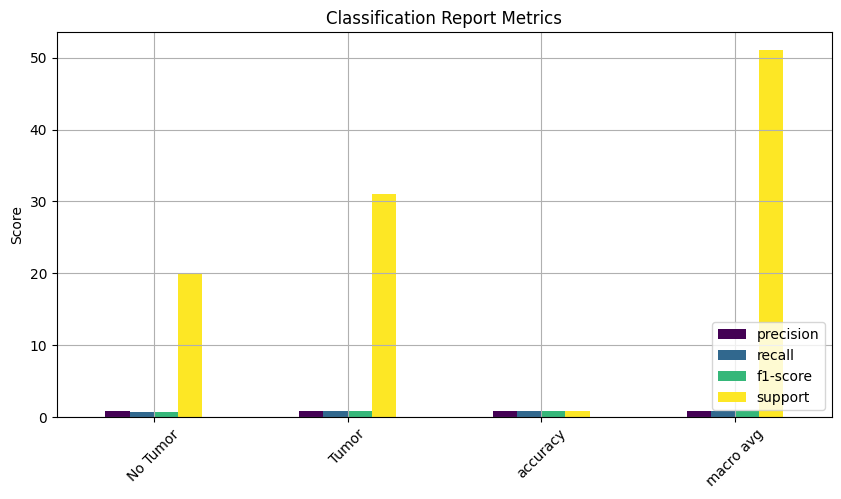

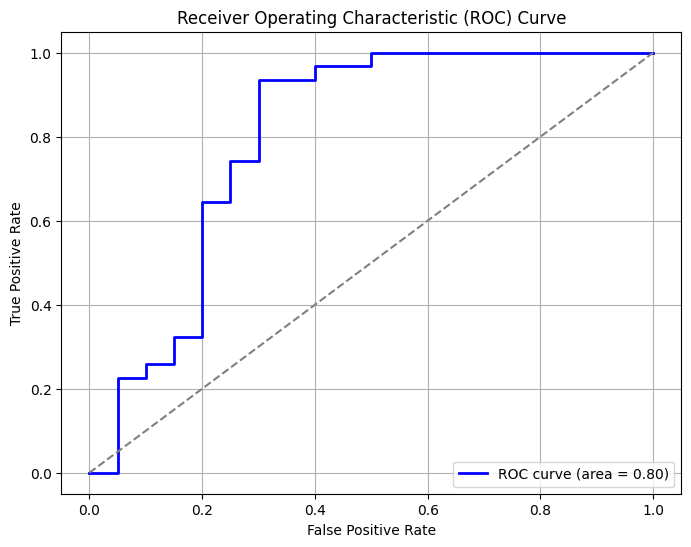

In [20]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# ✅ 1️⃣ Plot Training & Testing Accuracy per Epoch
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Train Accuracy", marker='o', linestyle='dashed')
plt.plot(test_accuracies, label="Test Accuracy", marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training & Testing Accuracy per Epoch")
plt.legend()
plt.grid(True)
plt.show()

# ✅ 2️⃣ Plot Training & Testing Loss per Epoch
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", marker='o', linestyle='dashed')
plt.plot(test_losses, label="Test Loss", marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Testing Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

# ✅ 3️⃣ Evaluate Model on Test Data
y_true, y_pred, y_prob = [], [], []
quantum_model.eval()

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = quantum_model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        probs = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()[:, 1]  # Get probabilities for class "Tumor"
        labels = torch.argmax(y_batch, dim=1).cpu().numpy()
        
        y_pred.extend(preds)
        y_true.extend(labels)
        y_prob.extend(probs)

# ✅ 4️⃣ Generate Classification Report
report = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"])
print("\n🔹 Classification Report:\n")
print(report)

# ✅ 5️⃣ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# ✅ 6️⃣ Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ 7️⃣ Convert Classification Report to DataFrame for Bar Chart
report_dict = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# ✅ 8️⃣ Plot Classification Report Metrics as Bar Chart
plt.figure(figsize=(8, 5))
report_df.iloc[:-1, :].plot(kind='bar', figsize=(10, 5), colormap="viridis")
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ✅ 9️⃣ ROC Curve (Receiver Operating Characteristic Curve)
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


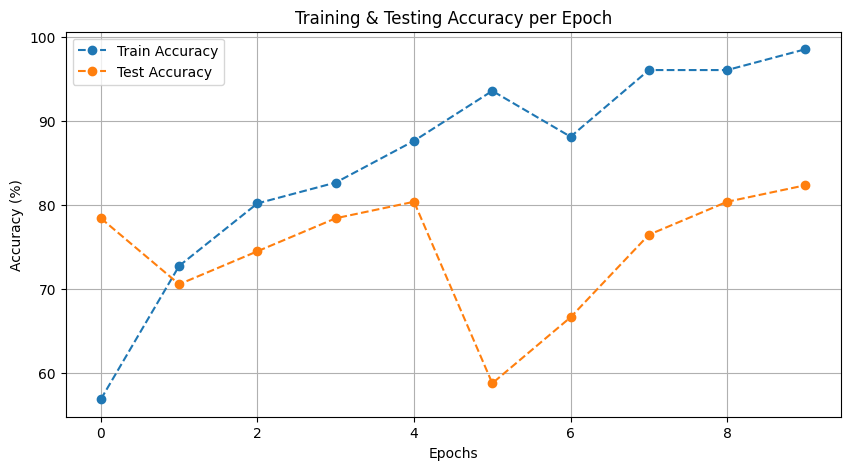

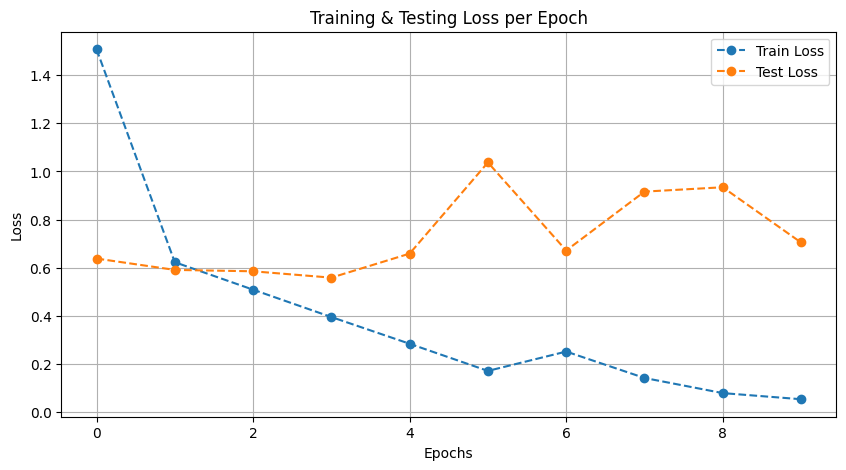

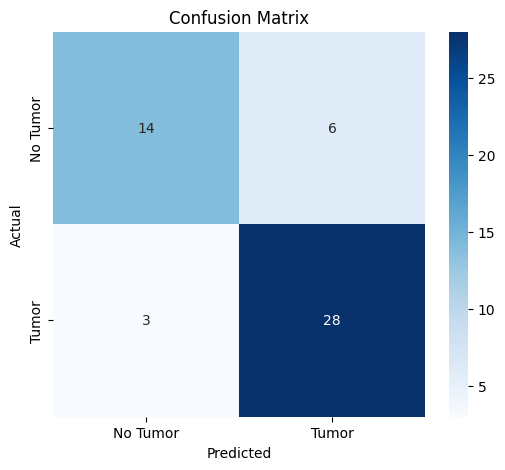

<Figure size 800x500 with 0 Axes>

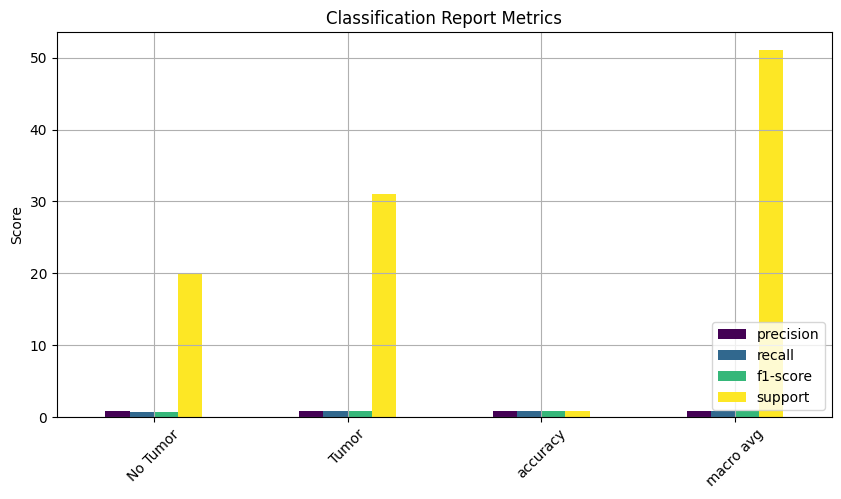

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ✅ Plot Training & Testing Accuracy per Epoch
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Train Accuracy", marker='o', linestyle='dashed')
plt.plot(test_accuracies, label="Test Accuracy", marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training & Testing Accuracy per Epoch")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Plot Training & Testing Loss per Epoch
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", marker='o', linestyle='dashed')
plt.plot(test_losses, label="Test Loss", marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Testing Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Confusion Matrix
y_true, y_pred = [], []
quantum_model.eval()

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = quantum_model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        labels = torch.argmax(y_batch, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(labels)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Classification Report as Bar Chart
report = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"], output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
report_df.iloc[:-1, :].plot(kind='bar', figsize=(10, 5), colormap="viridis")
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [24]:
import torch
import torchvision.transforms as transforms
import numpy as np
from PIL import Image

# ✅ Load the trained model
model_path = "quantum_cnn_model.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Initialize the Quantum-CNN Model
qnn = create_qnn()
quantum_layer = TorchConnector(qnn)
quantum_model = QuantumCNN(quantum_layer).to(device)
quantum_model.load_state_dict(torch.load(model_path, map_location=device))
quantum_model.eval()

# ✅ Class labels
class_labels = {0: "No Tumor", 1: "Tumor"}

# ✅ Function to preprocess image
def preprocess_image(image_path, target_size=(128, 128)):
    try:
        image = Image.open(image_path).convert("RGB").resize(target_size)
        image = np.array(image) / 255.0  # Normalize
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

# ✅ Function to predict tumor presence
def predict_image(image_path):
    image_tensor = preprocess_image(image_path)
    if image_tensor is None:
        return

    with torch.no_grad():
        output = quantum_model(image_tensor)
        predicted_class = torch.argmax(output, dim=1).item()

    print(f"\n🔹 Prediction: {class_labels[predicted_class]}")

# ✅ Take user input for image path and predict
image_path = input("Enter the path of the brain MRI image: ")
predict_image(image_path)


Enter the path of the brain MRI image:  /kaggle/input/brain-mri-images-for-brain-tumor-detection/no/1 no.jpeg



🔹 Prediction: No Tumor
